In [361]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [362]:
def distance(a,b):                                                                        #calculate the distance between two points
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def create(L):                                                                            #create a matrix of dimension LxL with all ones
    M = np.ones(shape=(L,L))
    return M

def big_matrix(M):                                                                        #create a big matrix 3Lx3L to take PBC into account
    M1 = np.hstack((M,M,M))
    M2 = np.vstack((M1,M1,M1))
    return M2    
    
def x_0(L):                                                                               #take a random point from the initial matrix
    x = random.uniform(L,2*L)
    y = random.uniform(L,2*L)
    center = [x,y]
    return center

def small_matrix(M,c,r):
    A = M[round(c[0]-r-1):round(c[0]+r+2),round(c[1]-r-1):round(c[1]+r+2)]                #take a small matrix centered in x_0 of "radius" r+1
    return A

def count(small,x,r):                                                                     #count how many points are at a distance <= r from x
    n = 0
    l = len(small)
    c = [round((l+1)/2-1)+(x[0]-round(x[0])),round((l+1)/2-1)+(x[1]-round(x[1]))]
    for i in range(l):
        for j in range(l):
            y = [i,j]
            d = distance(y,c)
            if d <= r :
                n += 1
    return n

def arr_counts(L,n,R,big):                                                                # L size, n number of random points, R radius,
    arr = []                                                                              # big is the big matrix (3*L x 3*L)
    for i in range(n):
        center = x_0(L)
        small = small_matrix(big, center, R)
        arr.append(count(small,center,R))
    return arr

def variance(arr):
    mom = np.power(arr,2)
    return np.average(mom)-np.power(np.average(arr),2)

def create_prova(L):
    A = np.arange(L**2).reshape((L, L))
    return A

def rescaled_variance_size(L):
    A = create(L)
    B = big_matrix(A)
    arr_variance = []
    radius = np.linspace(0.01,L/2,num=200)
    for r in radius:
        arr = arr_counts(L,10000,r,B)
        var = variance(arr)
        arr_variance.append(var/r**2)   
    return arr_variance



In [380]:
def shuffled(L, Δ):
    
    x=[]
    y=[]
    
    A = []
    
    original = np.linspace(1,L,L)
    
    for i in original:
        for j in original:
        
            x.append(i+random.uniform(low= -Δ/2, high=Δ/2))   
            y.append(j+random.uniform(low= -Δ/2, high=Δ/2)) 
        
           # i =  i + random.uniform(low= -Δ/2, high=Δ/2)
           # j =  j + random.uniform(low= -Δ/2, high=Δ/2)   
            
    return x,y


def big_matrix_shuff(M):  #create a big matrix 3Lx3L to take PBC into account

    shuffled_X = np.array(M[0])
    shuffled_Y = np.array(M[1])

    shuffled_X_1= np.hstack((shuffled_X,shuffled_X+L,shuffled_X+2*L))
    shuffled_X_2 = np.vstack((shuffled_X_1,shuffled_X_1,shuffled_X_1))

    shuffled_Y_1= np.hstack((shuffled_Y,shuffled_Y,shuffled_Y))
    shuffled_Y_2 = np.vstack((shuffled_Y_1,shuffled_Y_1+L,shuffled_Y_1+2*L))

    return shuffled_X_2,shuffled_Y_2    

def small_matrix(M,c,r):
    
    shuffled_X = np.array(M[0])
    shuffled_Y = np.array(M[1])
    
    shuffled_X = shuffled_X[round(c[0]-r-1):round(c[0]+r+2)]   #take a small matrix centered in x_0 of "radius" r+1
    shuffled_Y = shuffled_Y[round(c[1]-r-1):round(c[1]+r+2)]   
    
    return shuffled_X,shuffled_Y

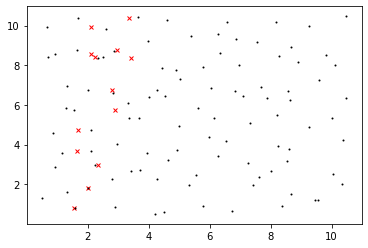

In [377]:
M = shuffled(L=10, Δ=1)

shuffled_X = np.array(M[0])
shuffled_Y = np.array(M[1])

small_X, small_Y = small_matrix(M,x_0(L=10),r=5)

plt.plot(small_X,small_Y,'x', color='red', markersize=4)
plt.plot(shuffled_X,shuffled_Y,'o', color='black', markersize=1)



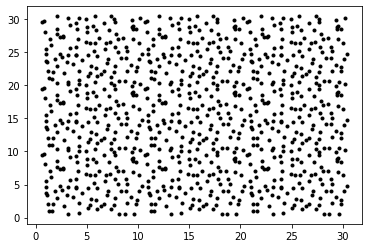

In [365]:
M = shuffled(L=10, Δ=1)
shuffled_X, shuffled_Y = big_matrix_shuff(M)
plt.plot(shuffled_X,shuffled_Y,'o', color='black', markersize=3)


In [417]:
def matrix(M,L):
    
    array = {}

    shuffled_X = np.array(M[0])
    shuffled_Y = np.array(M[1])
    
    positions = np.linspace(0,L*L-1, L*L)
    positions = positions.astype(int)
    
    for i in positions: 
    #array[int(i/L),i%L] = [shuffled_X[i],shuffled_Y[i]]
        print(i)

        return array

In [419]:
M = shuffled(L=1, Δ=1)
M1 = matrix(M,L=1)
print(M1)

0
{}


In [273]:
shuffled_X = np.array(M[0])
shuffled_Y = np.array(M[1])
print(range(len(shuffled_X)))

range(0, 100)


In [311]:
i=12
j=12
array = {}
array[int(i/L),j%L] = [shuffled_X[i],shuffled_Y[j]]

print(array)

{(1, 2): [2.456307789408635, 2.811285895725928]}
